In [1]:
#!git clone -q https://github.com/saic-vul/ritm_interactive_segmentation
!git clone -q https://github.com/code-ultron/RITM
URL_PREFIX_RITM = "https://github.com/saic-vul/ritm_interactive_segmentation/releases/download/v1.0"
WEIGHTS_FOLDER = "./RITM/weights"

!mkdir -p {WEIGHTS_FOLDER}

# CHOOSE MODEL HERE
# possible choices are: coco_lvis_h18s_itermask,  coco_lvis_h18_baseline, coco_lvis_h18_itermask,
# coco_lvis_h18_itermask, sbd_h18_itermask
MODEL_NAME = "coco_lvis_h18_baseline"
WEIGHTS_URL = f"{URL_PREFIX_RITM}/{MODEL_NAME}.pth"
!wget -q -P {WEIGHTS_FOLDER} {WEIGHTS_URL}

!pip3 install -q -r ./RITM/requirements.txt
%cd RITM/

/home/camit/ThesisProject/RITM


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
import torch
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow

sys.path.insert(0, './')

from isegm.utils import vis, exp
from isegm.inference import utils
from isegm.inference.evaluation import evaluate_test

device = torch.device('cuda:0')
cfg = exp.load_config_file('./config.yml', return_edict=True)

In [3]:
from isegm.inference.predictors import get_predictor

EVAL_MAX_CLICKS = 20
MODEL_THRESH = 0.49

checkpoint_path = utils.find_checkpoint(cfg.INTERACTIVE_MODELS_PATH, MODEL_NAME)
model = utils.load_is_model(checkpoint_path, device)

# Possible choices: 'NoBRS', 'f-BRS-A', 'f-BRS-B', 'f-BRS-C', 'RGB-BRS', 'DistMap-BRS'
brs_mode = 'NoBRS'
predictor = get_predictor(model, brs_mode, device, prob_thresh=MODEL_THRESH)

In [4]:
import cv2
import numpy as np
from PIL import Image

#from google.colab.patches import cv2_imshow

# image = cv2.imread('edge_1_shaft_1.jpg')
# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Open image file
im = Image.open("/home/camit/ThesisProject/RITM/datafolder/edge_3_shaft_1_undamaged.png")

# Convert image to numpy array
im_arr = np.array(im)

# Convert image to grayscale
gray = np.dot(im_arr[...,:3], [0.299, 0.587, 0.114])


# Create a kernel (a matrix of ones with the same size of the neighborhood pixels)
kernel = np.ones((4,4), np.uint8)

# Apply erosion to the image
# The first argument is the grayscale image
# The second argument is the kernel
# The third argument is the number of iterations
eroded = cv2.erode(gray, kernel, iterations=5)

# Apply dilation to the image
# The first argument is the grayscale image
# The second argument is the kernel
# The third argument is the number of iterations
dilated = cv2.dilate(eroded, kernel, iterations=3)


cv2.imwrite("output_test1.png", dilated)

resized_image = cv2.resize(dilated, (800, 500))

# from IPython.display import Image
# scheme = Image(filename='/home/camit/ThesisProject/RITM/output_test1.jpg',width=1000)    

# display(scheme)


In [5]:
import cv2
import numpy as np
from PIL import Image

#from google.colab.patches import cv2_imshow

# image = cv2.imread('edge_1_shaft_1.jpg')
# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Open image file
im = Image.open("/home/camit/ThesisProject/RITM/datafolder/edge_3_shaft_1_damaged.png")

# Convert image to numpy array
im_arr = np.array(im)

# Convert image to grayscale
gray = np.dot(im_arr[...,:3], [0.299, 0.587, 0.114])


# Create a kernel (a matrix of ones with the same size of the neighborhood pixels)
kernel = np.ones((4,4), np.uint8)

# Apply erosion to the image
# The first argument is the grayscale image
# The second argument is the kernel
# The third argument is the number of iterations
eroded = cv2.erode(gray, kernel, iterations=5)

# Apply dilation to the image
# The first argument is the grayscale image
# The second argument is the kernel
# The third argument is the number of iterations
dilated = cv2.dilate(eroded, kernel, iterations=3)


cv2.imwrite("output_test1_damged.png", dilated)

resized_image = cv2.resize(dilated, (800, 500))


In [6]:
from PIL import Image
import cv2


# Open the image
img = Image.open("/home/camit/ThesisProject/RITM/output_test1.png").convert("RGB")
#img = Image.open("/content/edge_4_shaft_1.jpg")
# Get the width and height of the image
width, height = img.size
print("Width:", width)
print("Height:", height)

# Resize the image
# img = img.resize((481,321))
# Open the mask image


clicks_list, pred = evaluate_test(img, predictor,1)
pred_mask = pred > MODEL_THRESH
draw = vis.draw_with_blend_and_clicks(img, mask=pred_mask, clicks_list=clicks_list)
draw = np.concatenate((draw,
     255 * pred_mask[:, :, np.newaxis].repeat(3, axis=2),
    
), axis=1)


# Convert pred_mask to a 8-bit unsigned integer array
pred_mask_uint8 = (pred_mask * 255).astype(np.uint8)

# Save pred_mask as an image
img = Image.fromarray(pred_mask_uint8, mode='L')
img.save('pred_mask_1.png')

# plt.figure(figsize=(20, 30))
# plt.imshow(draw)
# plt.show()

Width: 2592
Height: 1944


/home/camit/.local/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
from PIL import Image
import cv2


# Open the image
img = Image.open("/home/camit/ThesisProject/RITM/output_test1_damged.png").convert("RGB")
#img = Image.open("/content/edge_4_shaft_1.jpg")
# Get the width and height of the image
width, height = img.size
print("Width:", width)
print("Height:", height)

# Resize the image
# img = img.resize((481,321))
# Open the mask image


clicks_list, pred = evaluate_test(img, predictor,1)
pred_mask = pred > MODEL_THRESH
draw = vis.draw_with_blend_and_clicks(img, mask=pred_mask, clicks_list=clicks_list)
draw = np.concatenate((draw,
     255 * pred_mask[:, :, np.newaxis].repeat(3, axis=2),
    
), axis=1)


# Convert pred_mask to a 8-bit unsigned integer array
pred_mask_uint8 = (pred_mask * 255).astype(np.uint8)

# Save pred_mask as an image
img = Image.fromarray(pred_mask_uint8, mode='L')
img.save('pred_mask_1_d.png')

# plt.figure(figsize=(20, 30))
# plt.imshow(draw)
# plt.show()

Width: 2592
Height: 1944


In [8]:
import cv2
import numpy as np
from PIL import Image



# image = cv2.imread('edge_1_shaft_1.jpg')

# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



# Open image file
im = Image.open("/home/camit/ThesisProject/RITM/datafolder/edge_1_shaft_3_undamaged.png")

# Convert image to numpy array
im_arr = np.array(im)

# Convert image to grayscale
gray = np.dot(im_arr[...,:3], [0.299, 0.587, 0.114])


# Create a kernel (a matrix of ones with the same size of the neighborhood pixels)
kernel = np.ones((4,4), np.uint8)

# Apply erosion to the image
# The first argument is the grayscale image
# The second argument is the kernel
# The third argument is the number of iterations
eroded = cv2.erode(gray, kernel, iterations=5)

# Apply dilation to the image
# The first argument is the grayscale image
# The second argument is the kernel
# The third argument is the number of iterations
dilated = cv2.dilate(eroded, kernel, iterations=3)


cv2.imwrite("output_test2.png", dilated)

resized_image = cv2.resize(dilated, (800, 500))

# img = cv2.imread('edge_1_shaft_d.jpg')
# cutting_tool = segment_cutting_tool(img)
# resized_image = cv2.resize(cutting_tool, (1200, 800))
# cv2_imshow("Damaged Image", resized_image)


In [9]:
from PIL import Image
import cv2


# Open the image
img = Image.open("output_test2.png").convert("RGB")
#img = Image.open("/content/edge_4_shaft_1.jpg")
# Get the width and height of the image
width, height = img.size
print("Width:", width)
print("Height:", height)

# Resize the image
# img = img.resize((481,321))
# Open the mask image


clicks_list, pred = evaluate_test(img, predictor,2)
#binary mask where values greater than MODEL_THRESH are set to 1 and values less than or equal to MODEL_THRESH are set to 0. 
pred_mask = pred > MODEL_THRESH
draw = vis.draw_with_blend_and_clicks(img, mask=pred_mask, clicks_list=clicks_list)
draw = np.concatenate((draw,
     255 * pred_mask[:, :, np.newaxis].repeat(3, axis=2),
    
), axis=1)



# Convert pred_mask to a 8-bit unsigned integer array
pred_mask_uint8 = (pred_mask * 255).astype(np.uint8)

# Save pred_mask as an image
img = Image.fromarray(pred_mask_uint8, mode='L')
img.save('pred_mask_2.png')


# plt.figure(figsize=(20, 30))
# plt.imshow(draw)
# plt.show()

Width: 2592
Height: 1944


In [19]:
img_path="/home/camit/ThesisProject/RITM/output_test1.png"
#img_path="/home/camit/ThesisProject/RITM/datafolder/edge_3_shaft_1_undamaged.png"
mask_path="/home/camit/ThesisProject/RITM/pred_mask_1.png"

weight_path_ssn=  "/home/camit/ThesisProject/RITM/datafolder/bset_model.pth"

In [20]:
import math
import numpy as np
import torch
import argparse
import os
!pip install imutils
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib
from RITM.superpixel.mask2metric import *
from RITM.superpixel.logical_constraints import *

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from skimage.color import rgb2lab
from skimage.segmentation._slic import _enforce_label_connectivity_cython 
from skimage.segmentation import mark_boundaries
#from superpixel.Siamese.src.infer_siamese import main_siamese
from torchvision import datasets, transforms, models
from superpixel.lib.ssn.ssn import sparse_ssn_iter

In [22]:

### Function that runs Superpixel Sampling Network
@torch.no_grad()
def inference(image, nspix, n_iter, fdim=None, color_scale=0.26, pos_scale=2.5, weight=None, enforce_connectivity=True):
 
    if weight is not None:
        from model import SSNModel
        model = SSNModel(fdim, nspix, n_iter).to("cuda")
        checkpoint = torch.load(weight)
        model.load_state_dict(checkpoint)
        model.eval()
    else:
        model = lambda data: sparse_ssn_iter(data, nspix, n_iter)

    height, width = image.shape[:2]

    nspix_per_axis = int(math.sqrt(nspix))
    pos_scale = pos_scale * max(nspix_per_axis/height, nspix_per_axis/width)    

    coords = torch.stack(torch.meshgrid(torch.arange(height, device="cuda"), torch.arange(width, device="cuda")), 0)
    coords = coords[None].float()

    image = rgb2lab(image)
    image = torch.from_numpy(image).permute(2, 0, 1)[None].to("cuda").float()

    inputs = torch.cat([color_scale*image, pos_scale*coords], 1)

    _, H, _ = model(inputs)

    labels = H.reshape(height, width).to("cpu").detach().numpy()

    if enforce_connectivity:
        segment_size = height * width / nspix
        min_size = int(0.02 * segment_size)   #0.06
        max_size = int(3 * segment_size)    #3
        labels = _enforce_label_connectivity_cython(
            labels[None], min_size, max_size)[0]

    return labels

##Function to set parameters of Superpixel Sampling Network
def ssn_generate(path):
    
    import time
    import argparse
    import matplotlib.pyplot as plt
    from skimage.segmentation import mark_boundaries
    from skimage import color
  
    """
      Args:
        image: numpy.ndarray
            An array of shape (h, w, c)
        nspix: int
            number of superpixels
        n_iter: int
            number of iterations
        fdim (optional): int
            feature dimension for supervised setting
        color_scale: float
            color channel factor
        pos_scale: float
            pixel coordinate factor
        weight: state_dict
            pretrained weight
        enforce_connectivity: bool
            if True, enforce superpixel connectivity in postprocessing
    """

    nspix=400
    fdim=20
    niter=50
    color_scale=0.26
    pos_scale=2.5
 

    image = cv2.imread(path)
   
    s = time.time()
    label = inference(image, nspix,niter, fdim,color_scale, pos_scale,weight_path_ssn)

    return label


image = cv2.imread(img_path)
segments = ssn_generate(img_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imsave("/home/camit/ThesisProject/RITM//ssn.png",mark_boundaries(image, segments))

In [23]:
height, width, channels = image.shape
image = cv2.imread(img_path)
mask =  cv2.imread(mask_path)
image_nr = os.path.basename(img_path)
h, w, c = image.shape

segments = ssn_generate(img_path)


categories = ["Background" , "Tool", "Wear"]
colors = ["#000000","#ffffff","#ffffff"]

for category in categories:
    name = category
    if not os.path.exists("/home/camit/ThesisProject/RITM/metric/reference/"):
        os.makedirs("/home/camit/ThesisProject/RITM/metric/reference/")
    if not os.path.exists("/home/camit/ThesisProject/RITM/metric/reference/"+name):
        os.makedirs("/home/camit/ThesisProject/RITM/metric/reference/"+name)


for i in range(0,(len(np.unique(segments)))):

    u,v=np.where(segments==i)

    leftmost = np.min(u)
    rightmost = np.max(u)
    topmost = np.min(v)
    bottommost = np.max(v)
    
    segment = image.copy()
    segment[segments!=i] = 0
    
    horizontal = rightmost- leftmost
    vertikal = bottommost-topmost

    if (vertikal<224):
        restv = 224 - vertikal
    else:
        restv=0
    if (horizontal<224):
        resth = 224 - horizontal
    else:
        resth = 0

    centerhorizontal = leftmost + int(horizontal/2)
    centervertical = topmost + int(vertikal/2)
    r,g,b = mask[centerhorizontal,centervertical]
    hex_color = matplotlib.colors.to_hex([(b/255), (g/255), (r/255) ])
    hex_color_close = matplotlib.colors.to_hex([(b/255), (g/255), ((r)/255) ])
   
    cleftmost = leftmost - int(resth/2)
    crightmost = rightmost + int(resth/2)
    cbottommost = bottommost + int(restv/2)
    ctopmost = topmost - int(restv/2)

    if (cleftmost>=1 and crightmost<=w and ctopmost>=1 and cbottommost<=h):        
        crop_img = segment[cleftmost:crightmost,ctopmost:cbottommost]   
        j=0
        for cat in categories:
            
            if (hex_color == colors[j] ):  
                cv2.imwrite(('/home/camit/ThesisProject/RITM/metric/reference/'+cat+"/"+image_nr+str(i)+'.png'),crop_img)
            j+=1   
        
    else:
        if (vertikal<224):
            restv = 224 - vertikal
        else:
            restv=0
        if (horizontal<224):
            resth = 224 - horizontal
        else:
            resth = 0
        crop_img = segment[leftmost:rightmost, topmost:bottommost] 
        crop_img = cv2.copyMakeBorder(crop_img, int(resth/2), int(resth/2), int(restv/2), int(restv/2), cv2.BORDER_CONSTANT, value=[0, 0, 0])   
        j=0
        for cat in categories:
            if (hex_color == colors[j]  ):  
                cv2.imwrite(('/home/camit/ThesisProject/RITM/metric/reference/'+cat+"/"+image_nr+str(i)+'_edge.png'),crop_img)
            j += 1

In [17]:
from IPython.display import Image

image1 = Image(filename='/home/camit/ThesisProject/RITM/metric/reference/Background/output_test1.png975_edge.png') 
image2 = Image(filename='/home/camit/ThesisProject/RITM/metric/reference/Tool/output_test1.png980.png')
image3 = Image(filename='/home/camit/ThesisProject/RITM/metric/reference/Wear/output_test1.png981.png')

display(image1,image2,image3)

FileNotFoundError: [Errno 2] No such file or directory: '/home/camit/ThesisProject/RITM/metric/reference/edge_3_shaft_1_undamaged.png975_edge.png'

In [52]:
# !pip install faiss
# !pip install natsort

img_inference_path_threshold="/home/camit/ThesisProject/RITM/output_test1.png"
#img_inference_path="/home/camit/ThesisProject/RITM/infer_img.png"
from superpixel.Siamese.src.infer_siamese import main_siamese_least
# from superpixel.Siamese.src.infer_siamese import main_siamese_threshold

categories = ["Background" , "Tool", "Wear"]
colors = ["#000000","#ffffff","#ffffff"]

image_inference = cv2.imread(img_inference_path_threshold)
h, w, c = image_inference.shape

ssn_generate(img_inference_path_threshold)
segments_1 = ssn_generate(img_inference_path_threshold)
 
segment_1 = image_inference.copy()
image_vec = []
seg_num = len(np.unique(segments_1))

for i in range(0,seg_num):
    u,v=np.where(segments_1==i)
    leftmost = np.min(u)
    rightmost = np.max(u)
    topmost = np.min(v)
    bottommost = np.max(v)
    
    segment_1 = image_inference.copy()
    segment_1[segments_1!=i] = 0
    
    horizontal = rightmost- leftmost
    vertikal = bottommost-topmost

    if (vertikal<224):
        restv = 224 - vertikal
    else:
        restv=0
    if (horizontal<224):
        resth = 224 - horizontal
    else:
        resth = 0
    
    cleftmost = leftmost - int(resth/2)
    crightmost = rightmost + int(resth/2)
    cbottommost = bottommost + int(restv/2)
    ctopmost = topmost - int(restv/2)

    if (cleftmost>=1 and crightmost<=w and ctopmost>=1 and cbottommost<=h):        
        crop_img = segment_1[cleftmost:crightmost,ctopmost:cbottommost]
    else:
        if (vertikal<224):
            restv = 224 - vertikal
        else:
            restv=0
        if (horizontal<224):
            resth = 224 - horizontal
        else:
            resth = 0
        crop_img = segment_1[leftmost:rightmost, topmost:bottommost] 
        crop_img = cv2.copyMakeBorder(crop_img, int(resth/2), int(resth/2), int(restv/2), int(restv/2), cv2.BORDER_CONSTANT, value=[0, 0, 0])         
    
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    

    to_pil = transforms.ToPILImage()
    imagee = transforms.ToPILImage()(crop_img)
    image_vec.append(imagee)
            
#distance, paths = main_siamese(image_vec)
distance_1, paths_1 = main_siamese_least(image_vec)




23-Apr-20 18:11:20  root  INFO: Initialized device cuda
23-Apr-20 18:11:20  root  INFO: Loaded checkpoint at 'checkpoint_path']
23-Apr-20 18:11:20  root  INFO: Loaded config: {'batch_size': 24,
 'embedding_size': 128,
 'gamma': 0.1,
 'image_size': 448,
 'lambda': 20,
 'lr': 0.0001,
 'margin': 0.01,
 'n_centers_per_class': 5,
 'pretrained': True,
 'tau': 0.0}
23-Apr-20 18:11:20  root  INFO: Initialized model: Resnet50(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3,

In [53]:
print("distance vector between same img  value")
print(distance_1)
threshold_value = max(max(row) for row in distance_1)
print(threshold_value)

distance vector between same img  value
[[0.0017858026549220085, 0.006628075614571571, 0.006628075614571571, 0.011505905538797379, 0.011505905538797379], [0.004300937056541443, 0.004947387147694826, 0.008049299009144306, 0.008493508212268353, 0.00870487280189991], [0.001623170217499137, 0.001623170217499137, 0.004312260076403618, 0.006277280393987894, 0.006277280393987894], [0.0034815233666449785, 0.004533985164016485, 0.004533985164016485, 0.006142366677522659, 0.012678094208240509], [0.003302902216091752, 0.0035280976444482803, 0.0035280976444482803, 0.004996111616492271, 0.007131829857826233], [0.006518400739878416, 0.00669581163674593, 0.008188746869564056, 0.012649093754589558, 0.012649093754589558], [0.004050131421536207, 0.006007125601172447, 0.006007125601172447, 0.01068840641528368, 0.01068840641528368], [0.007318930700421333, 0.00799371488392353, 0.009784840978682041, 0.012908479198813438, 0.013276506215333939], [0.010307671502232552, 0.01915574073791504, 0.01915574073791504,

In [54]:
# !pip install faiss
# !pip install natsort
img_inference_path="/home/camit/ThesisProject/RITM/datafolder/edge_3_shaft_1_damaged.png"

#img_inference_path="/home/camit/ThesisProject/RITM/infer_img.png"
from superpixel.Siamese.src.infer_siamese import main_siamese
# from superpixel.Siamese.src.infer_siamese import main_siamese_threshold

categories = ["Background" , "Tool", "Wear"]
colors = ["#000000","#ffffff","#ffffff"]

image_inference = cv2.imread(img_inference_path)
h, w, c = image_inference.shape

ssn_generate(img_inference_path)
segments = ssn_generate(img_inference_path)
 
segment = image_inference.copy()
image_vec = []
seg_num = len(np.unique(segments))

for i in range(0,seg_num):
    u,v=np.where(segments==i)
    leftmost = np.min(u)
    rightmost = np.max(u)
    topmost = np.min(v)
    bottommost = np.max(v)
    
    segment = image_inference.copy()
    segment[segments!=i] = 0
    
    horizontal = rightmost- leftmost
    vertikal = bottommost-topmost

    if (vertikal<224):
        restv = 224 - vertikal
    else:
        restv=0
    if (horizontal<224):
        resth = 224 - horizontal
    else:
        resth = 0
    
    cleftmost = leftmost - int(resth/2)
    crightmost = rightmost + int(resth/2)
    cbottommost = bottommost + int(restv/2)
    ctopmost = topmost - int(restv/2)

    if (cleftmost>=1 and crightmost<=w and ctopmost>=1 and cbottommost<=h):        
        crop_img = segment[cleftmost:crightmost,ctopmost:cbottommost]
    else:
        if (vertikal<224):
            restv = 224 - vertikal
        else:
            restv=0
        if (horizontal<224):
            resth = 224 - horizontal
        else:
            resth = 0
        crop_img = segment[leftmost:rightmost, topmost:bottommost] 
        crop_img = cv2.copyMakeBorder(crop_img, int(resth/2), int(resth/2), int(restv/2), int(restv/2), cv2.BORDER_CONSTANT, value=[0, 0, 0])         
    
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    

    to_pil = transforms.ToPILImage()
    imagee = transforms.ToPILImage()(crop_img)
    image_vec.append(imagee)
            
#distance, paths = main_siamese(image_vec)
distance, paths = main_siamese(image_vec)

k = 0
count = 0
for path in paths:        

    header = []
    dinstances = distance[k]
    for i in range(5):
        distance_value = dinstances[i]
        if (distance_value >=threshold_value):
            red = np.array((255, 0, 0))
            color = red
            color = np.flip(color)
            image_inference[segments==k] = color.astype(int)
            count=count+1
    
    k=k+1 

mask_colored = cv2.cvtColor(image_inference, cv2.COLOR_BGR2RGB)
plt.imsave( ("/home/camit/ThesisProject/RITM/superpixel/images/"  + os.path.basename(img_inference_path)+"_mask.png"),mask_colored)   
 

23-Apr-20 18:15:49  root  INFO: Initialized device cuda
23-Apr-20 18:15:50  root  INFO: Loaded checkpoint at 'checkpoint_path']
23-Apr-20 18:15:50  root  INFO: Loaded config: {'batch_size': 24,
 'embedding_size': 128,
 'gamma': 0.1,
 'image_size': 448,
 'lambda': 20,
 'lr': 0.0001,
 'margin': 0.01,
 'n_centers_per_class': 5,
 'pretrained': True,
 'tau': 0.0}
23-Apr-20 18:15:50  root  INFO: Initialized model: Resnet50(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3,

In [55]:

print("distance vector between diff img  value")
print(distance)
max_value = max(max(row) for row in distance)
print(max_value)
print(count)

distance vector between diff img  value
[[0.0037581713404506445, 0.004112275317311287, 0.004112275317311287, 0.005775574129074812, 0.005775574129074812], [0.0015603017527610064, 0.004023763816803694, 0.0046957493759691715, 0.005606784950941801, 0.008121708407998085], [0.01203056238591671, 0.012668740935623646, 0.012668740935623646, 0.015230095013976097, 0.015230095013976097], [0.0009329784079454839, 0.0009329784079454839, 0.006194720044732094, 0.006194720044732094, 0.006869758013635874], [0.0040487078949809074, 0.004944258369505405, 0.0058407229371368885, 0.006886675953865051, 0.007863098755478859], [0.0009268287103623152, 0.002123017329722643, 0.004958229139447212, 0.006404994986951351, 0.006611103191971779], [0.00589911499992013, 0.006037699058651924, 0.010590391233563423, 0.010644853115081787, 0.013787595555186272], [0.002215071814134717, 0.002215071814134717, 0.0061686113476753235, 0.0061686113476753235, 0.006287611089646816], [0.009932507760822773, 0.009932507760822773, 0.01086976

In [56]:
print("path vector value")
print(paths)

path vector value
[['metric/reference/Background/edge_3_shaft_1_undamaged.png2_edge.png', 'metric/reference/Wear/edge_3_shaft_1_undamaged.png172_edge.png', 'metric/reference/Tool/edge_3_shaft_1_undamaged.png172_edge.png', 'metric/reference/Wear/edge_3_shaft_1_undamaged.png335_edge.png', 'metric/reference/Tool/edge_3_shaft_1_undamaged.png335_edge.png'], ['metric/reference/Background/edge_3_shaft_1_undamaged.png4_edge.png', 'metric/reference/Background/edge_3_shaft_1_undamaged.png7_edge.png', 'metric/reference/Background/edge_3_shaft_1_undamaged.png5_edge.png', 'metric/reference/Background/edge_3_shaft_1_undamaged.png228_edge.png', 'metric/reference/Background/edge_3_shaft_1_undamaged.png3_edge.png'], ['metric/reference/Background/edge_3_shaft_1_undamaged.png31_edge.png', 'metric/reference/Tool/edge_3_shaft_1_undamaged.png518.png', 'metric/reference/Wear/edge_3_shaft_1_undamaged.png518.png', 'metric/reference/Wear/edge_3_shaft_1_undamaged.png762_edge.png', 'metric/reference/Tool/edge_3_s

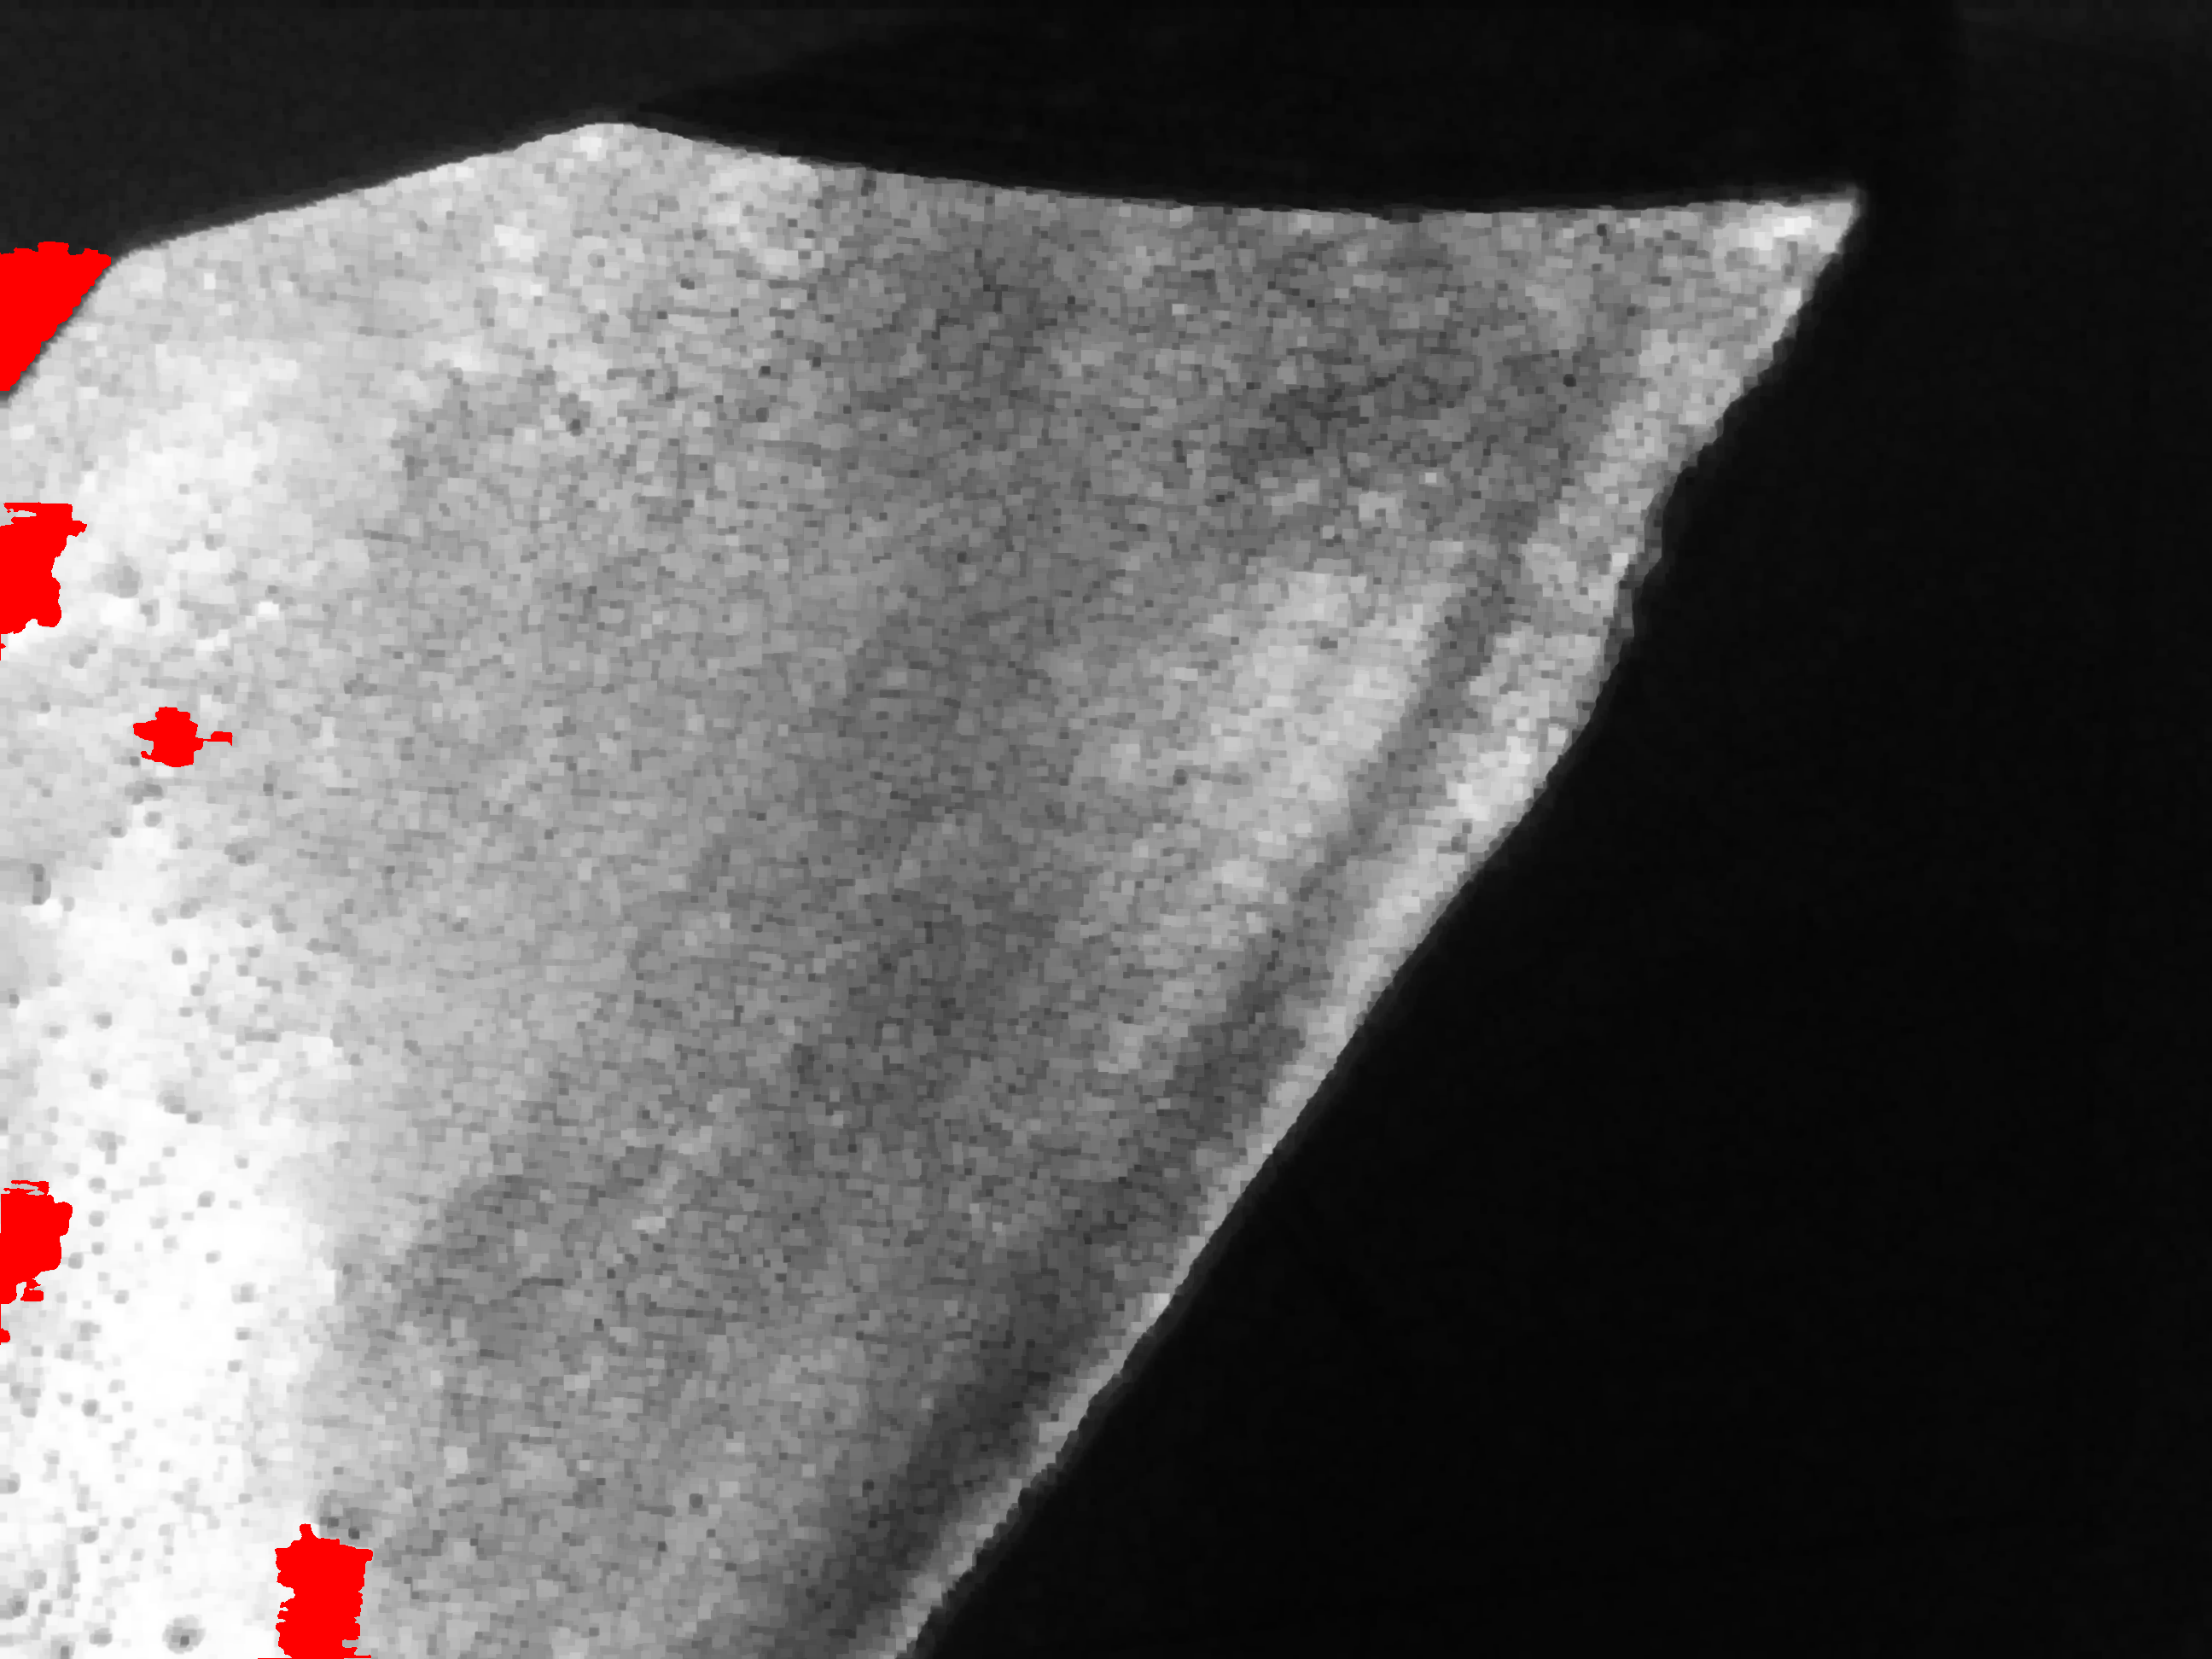

In [48]:
from IPython.display import Image
Image(filename='/home/camit/ThesisProject/RITM/superpixel/images/output_test1_damged.png_mask.png',width=700)  